# Tasks Breakdown:

1. Data Understanding & Insights
    - Load and explore the dataset using pandas and matplotlib/seaborn.

Perform exploratory data analysis (EDA):

- Find missing values, data types, and unique categories.
- Visualize key relationships:
     - Attrition vs. Age
     - Attrition vs. MonthlyIncome
     - Attrition vs. Department
     - Correlation heatmap for numerical features.
- Write 3–5 key insights from your observations (e.g., “Younger employees tend to leave more frequently.”)

2. Data Preprocessing (Pipeline Implementation)
Split the dataset into train and test sets (80:20).
Use a ColumnTransformer and Pipeline to perform:
- Numerical preprocessing: SimpleImputer(strategy='mean') + StandardScaler
- Categorical preprocessing: SimpleImputer(strategy='most_frequent') + OneHotEncoder(handle_unknown='ignore')
- Combine preprocessing and model into a single pipeline for each model type.

3. Model Implementation
Train and evaluate the following models using the preprocessed data:
- Linear Regression (for predicting MonthlyIncome as an additional regression subtask)
- Logistic Regression (for Attrition classification)
- Regularized Linear Models:
    - Ridge
    - LASSO
    - Elastic Net
    - Decision Tree Classifier
- Use GridSearchCV to tune hyperparameters such as:
    - Ridge/LASSO alpha values
    - ElasticNet l1_ratio
    - DecisionTree depth and min_samples_split

4. Model Evaluation
Use appropriate metrics:
- For regression: RMSE, R² Score
- For classification: Accuracy, Precision, Recall, F1 Score, ROC-AUC
- Create a comparison dataframe summarizing all models’ performances.
    - Plot ROC curves for classification models.

5. Insights & Interpretation
- Identify which model performs best and why.
- Discuss which features most strongly influence Attrition (use .coef_ or feature_importances_).
- Write a short business interpretation of the findings:
    - “Employees with low satisfaction and longer overtime hours are more likely to leave.”
    - “Elastic Net performed best with balanced bias-variance trade-off.”

💡 Stretch Goal (Optional)

Use Pipeline + GridSearchCV end-to-end automation.

Perform feature selection using model coefficients or recursive elimination.

Visualize Decision Tree structure using plot_tree().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## No missing values

In [4]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


### some columns have only 1 unique value- removing those columns

In [5]:
df_clean = df.drop(df.columns[df.nunique() == 1], axis=1)
df_clean.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeNumber,1470
EnvironmentSatisfaction,4


In [7]:
df_clean["Attrition"].value_counts()

,count
Attrition,
No,1233
Yes,237


<Axes: >

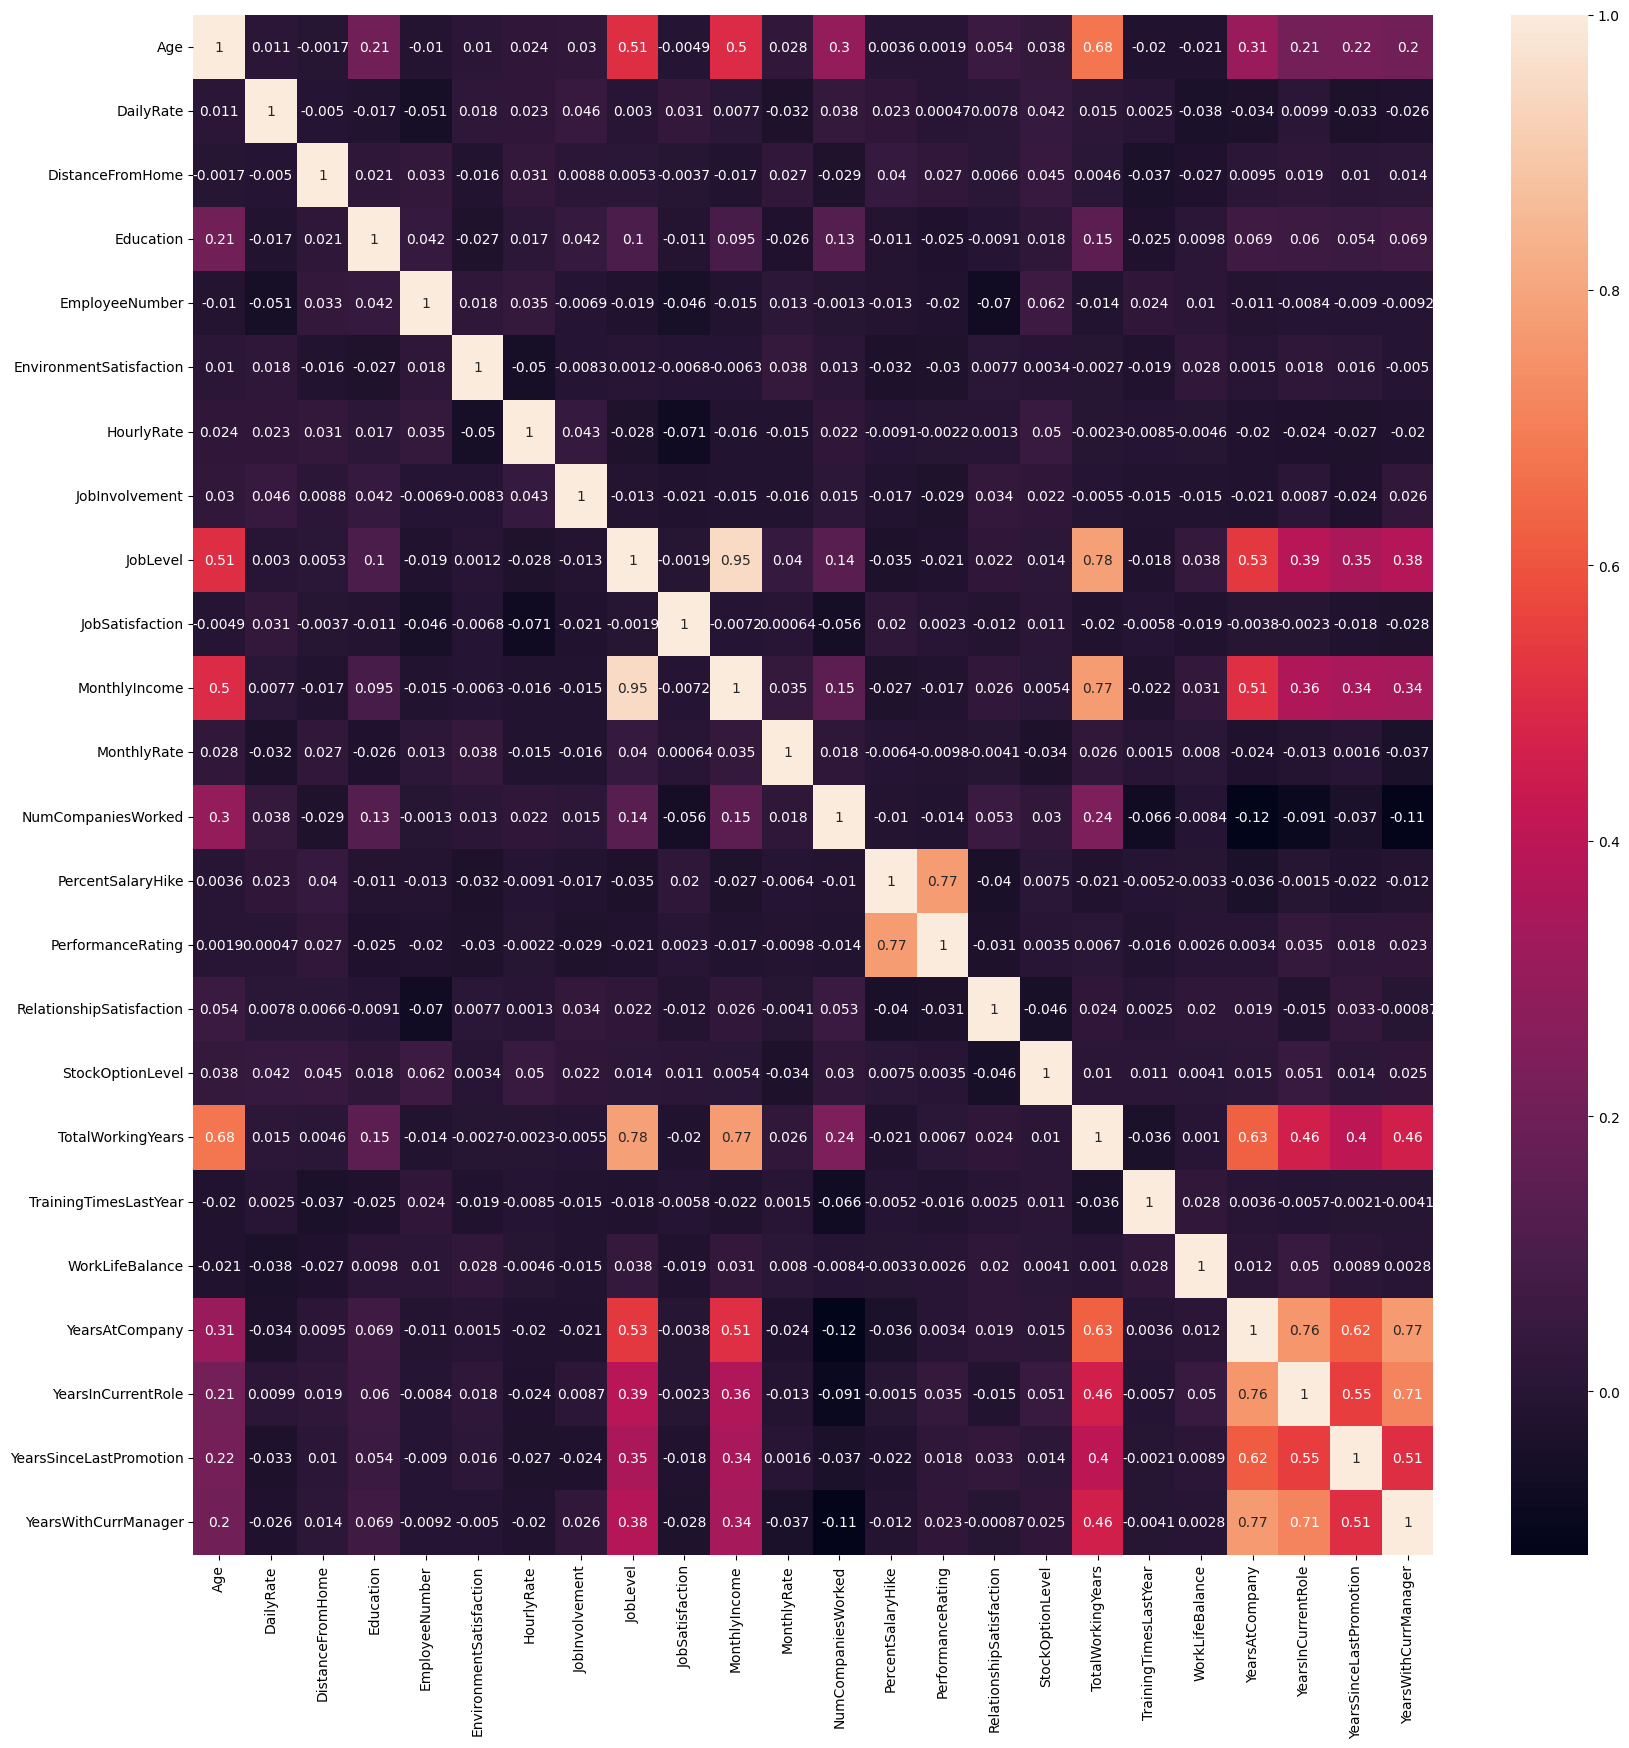

In [10]:
df_clean.select_dtypes(include=['float', 'int']).corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_clean.select_dtypes(include=['float', 'int']).corr(), annot=True)